# **Scraping Data from A real Website + Pandas**





In [169]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the Wikipedia page
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_by_revenue'

# Send a GET request to the URL
page = requests.get(url)





In [170]:
# Parse the page content using BeautifulSoup
soup = BeautifulSoup(page.text, 'html.parser')

# Find the table by a simpler class name search
table = soup.find('table', {'class': 'wikitable'})


In [171]:

# Check if the table was found
if table:
    # Extract table headers
    headers = []
    for th in table.find_all('th'):
        headers.append(th.text.strip())

    # Extract table rows and data
    data = []
    for row in table.find_all('tr')[1:]:  # Skip the header row
        row_data = [cell.get_text(strip=True) for cell in row.find_all(['td', 'th'])]
        data.append(row_data)

    # Create a DataFrame with flexible columns
    df = pd.DataFrame(data)

    # Set the headers as the first row in the DataFrame
    df.columns = headers[:len(df.columns)]

    # Display the DataFrame
    print(df)
else:
    print("Table not found on the page.")

            Rank                                     Name  \
0   USD millions                                     None   
1              1                                  Walmart   
2              2                                   Amazon   
3              3          State Grid Corporation of China   
4              4                             Saudi Aramco   
5              5          China Petrochemical Corporation   
6              6     China National Petroleum Corporation   
7              7                                    Vitol   
8              8                                    Apple   
9              9                       UnitedHealth Group   
10            10                       Berkshire Hathaway   
11            11                               CVS Health   
12            12                         Volkswagen Group   
13            13                               ExxonMobil   
14            14                                    Shell   
15            15     Chi

In [172]:
# Display the column names of the DataFrame
# Delete the first row in the DataFrame
df = df.drop(index=0).reset_index(drop=True)

# Display the updated DataFrame
print(df)


   Rank                                     Name                Industry  \
0     1                                  Walmart                  Retail   
1     2                                   Amazon                  Retail   
2     3          State Grid Corporation of China             Electricity   
3     4                             Saudi Aramco             Oil and gas   
4     5          China Petrochemical Corporation             Oil and gas   
5     6     China National Petroleum Corporation             Oil and gas   
6     7                                    Vitol             Commodities   
7     8                                    Apple  Information technology   
8     9                       UnitedHealth Group              Healthcare   
9    10                       Berkshire Hathaway              Financials   
10   11                               CVS Health              Healthcare   
11   12                         Volkswagen Group              Automotive   
12   13     

<ipython-input-180-a333a06f70c0>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Revenue', y='Name', data=df, palette='viridis')


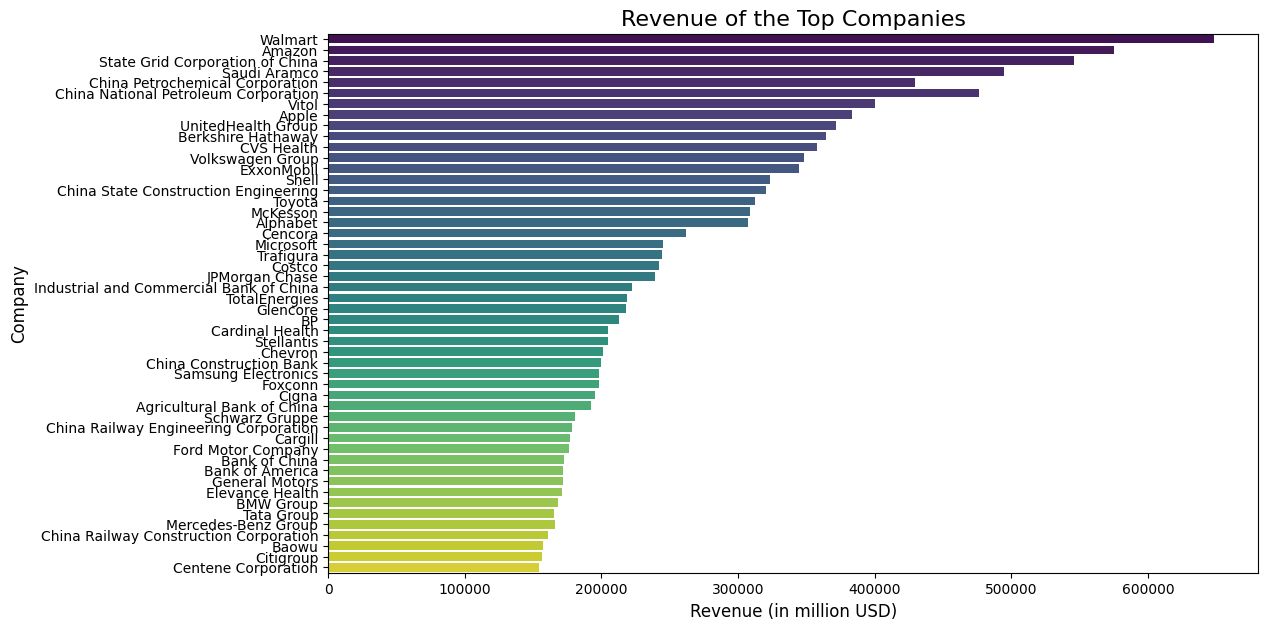

In [180]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Clean the column names to remove extra spaces and special characters
df.columns = df.columns.str.strip()

# Remove any currency symbols and commas, then convert to numeric for Revenue
df['Revenue'] = df['Revenue'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Assuming df is your DataFrame and the data has been cleaned as per previous steps

plt.figure(figsize=(12, 7))  # Increase the size for clarity
sns.barplot(x='Revenue', y='Name', data=df, palette='viridis')
plt.title('Revenue of the Top Companies', fontsize=16)
plt.xlabel('Revenue (in million USD)', fontsize=12)
plt.ylabel('Company', fontsize=12)
plt.xticks(fontsize=10)  # Adjust tick label size for better readability
plt.yticks(fontsize=10)
plt.show()




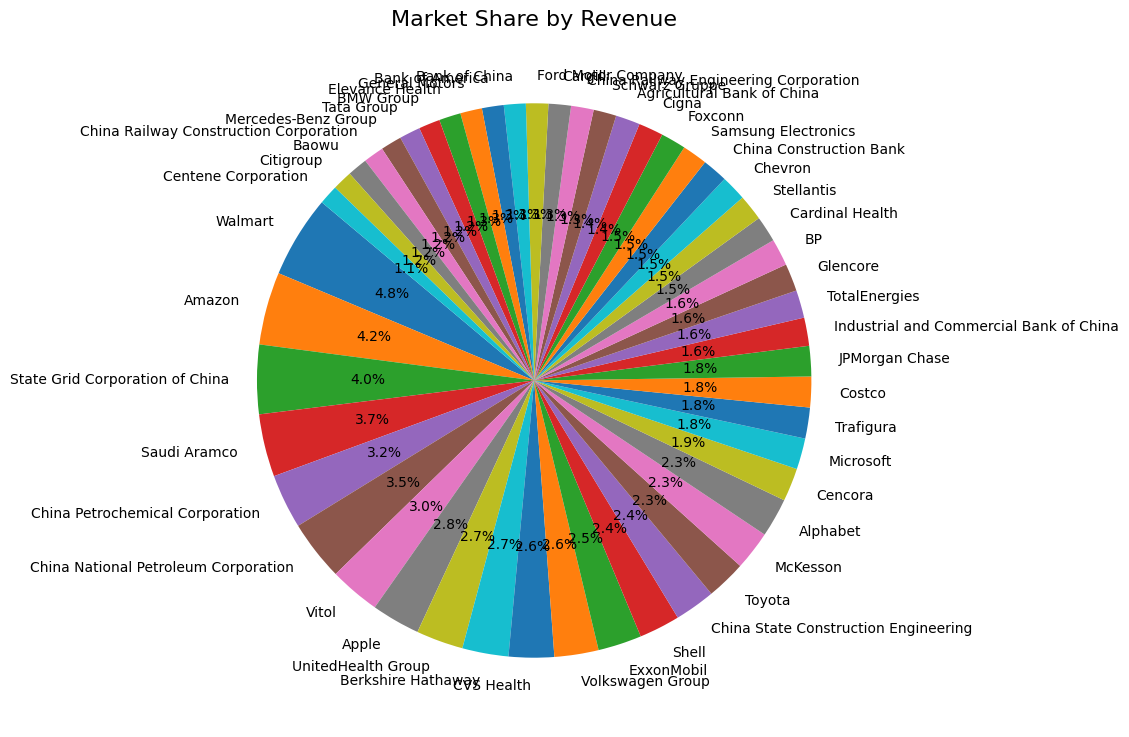

In [181]:
# 2. Pie Chart: Market Share Based on Revenue
plt.figure(figsize=(9, 9))
plt.pie(df['Revenue'], labels=df['Name'], autopct='%1.1f%%', startangle=140)
plt.title('Market Share by Revenue', fontsize=16)
plt.show()

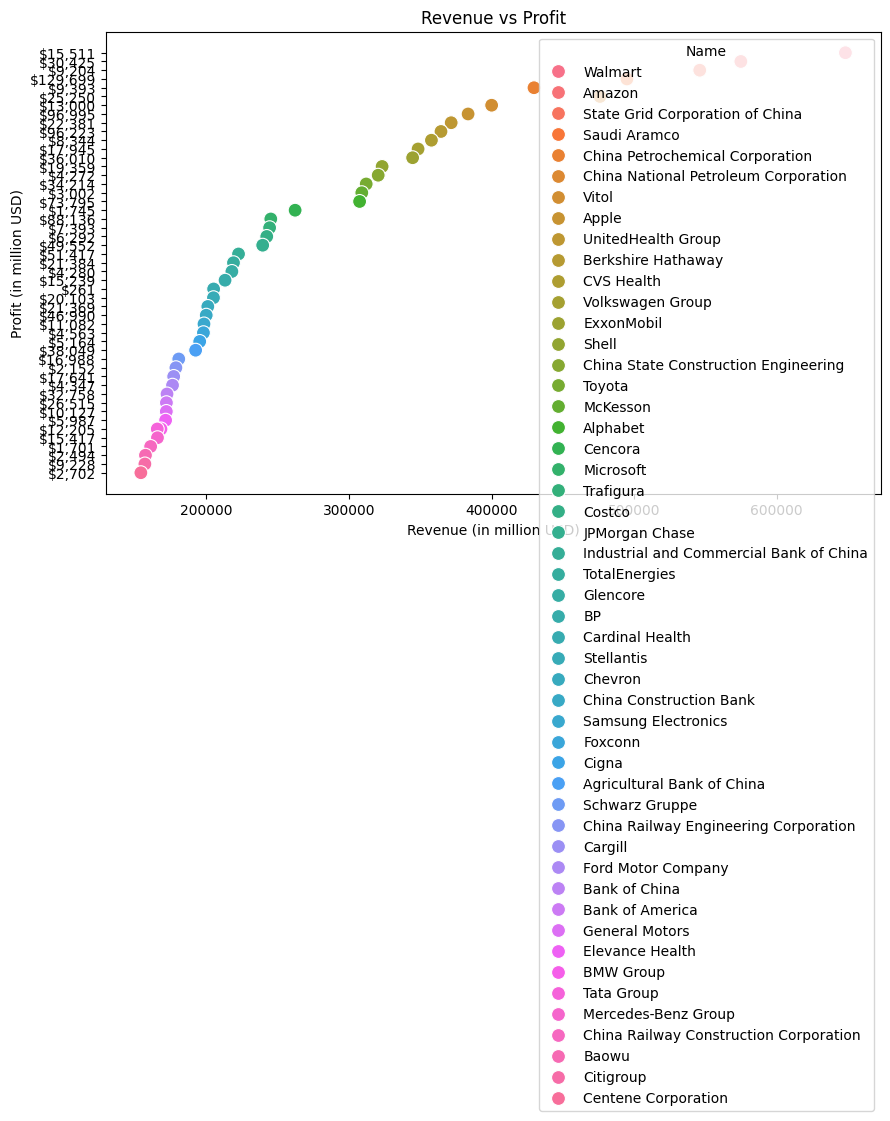

In [177]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Revenue', y='Profit', hue='Name', data=df, s=100)
plt.title('Revenue vs Profit', fontsize=16)
plt.xlabel('Revenue (in million USD)', fontsize=12)
plt.ylabel('Profit (in million USD)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

<ipython-input-182-2c31f4432241>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Employees', y='Name', data=df, palette='Blues_r', orient='h')  # Horizontal bars


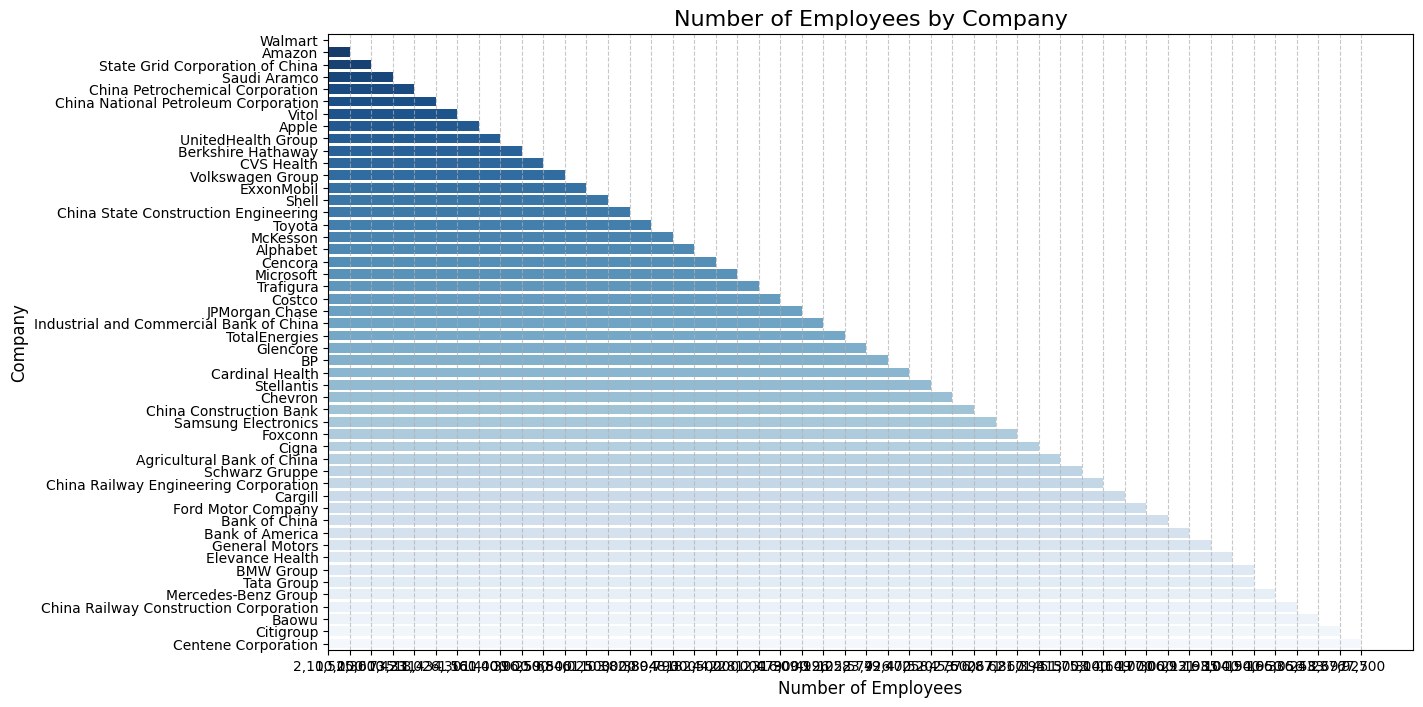

In [182]:
# 4. Bar Chart: Number of Employees by Company (Horizontal for clarity)
plt.figure(figsize=(14, 8))  # Larger figure for better visualization
sns.barplot(x='Employees', y='Name', data=df, palette='Blues_r', orient='h')  # Horizontal bars
plt.title('Number of Employees by Company', fontsize=16)
plt.xlabel('Number of Employees', fontsize=12)
plt.ylabel('Company', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)  # Add grid for better readability
plt.show()

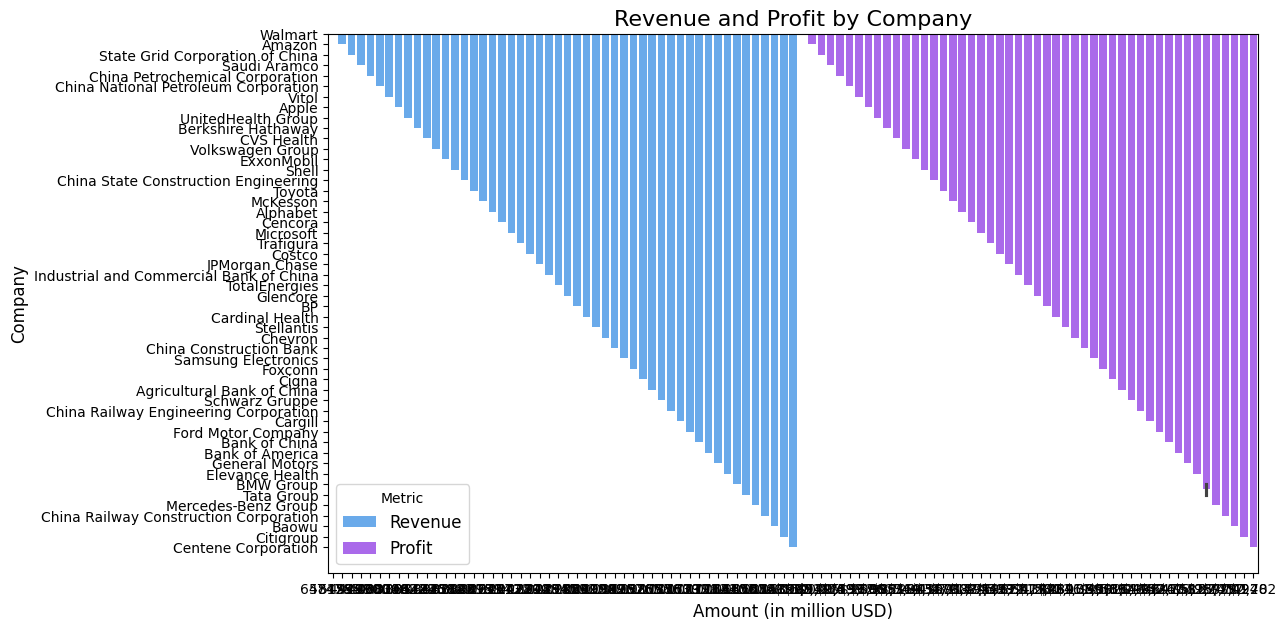

In [183]:
df_melted = df.melt(id_vars='Name', value_vars=['Revenue', 'Profit'], var_name='Metric', value_name='Amount')

plt.figure(figsize=(12, 7))
sns.barplot(x='Amount', y='Name', hue='Metric', data=df_melted, palette='cool')
plt.title('Revenue and Profit by Company', fontsize=16)
plt.xlabel('Amount (in million USD)', fontsize=12)
plt.ylabel('Company', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Metric', fontsize=12)
plt.show()